In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_decision_regions

## 로지스틱 회귀
* 주로 분류를 하기 위한 알고리즘
* 예0/아니오1 등의 이진분류에 많이 사용
* 의료,통신,데이터마이닝 분야의 회귀/분류를 위한 예측모델로 활용

### 선형회귀의 함정

In [3]:
# 특정 곤충질량에 따라 암수구분하는 모델 생성
X = np.array([1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6])
y = np.array([1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0])

### 데이터시각화

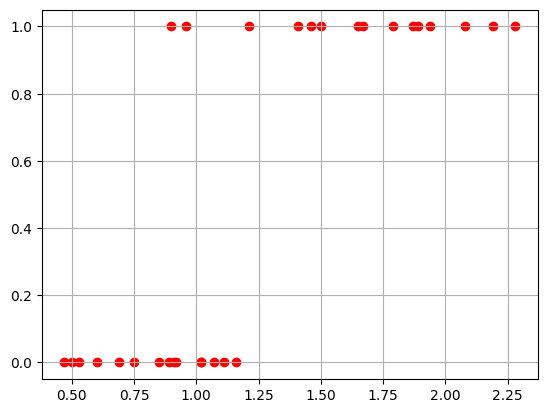

In [12]:
plt.scatter(X,y, color='red')
plt.grid()
plt.show()

### 선형회귀분석 실시

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1),y.reshape(-1,1))

print(lr.coef_, lr.intercept_)  # 기울기, 절편 출력

[[0.74825276]] [-0.43007818]


### 선형회귀분석 시각화

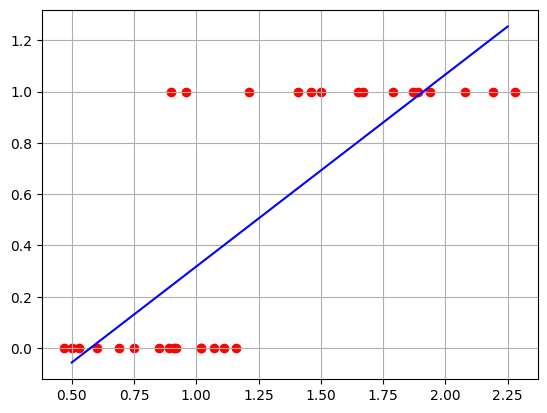

In [26]:
# 회귀방정식 : y = ax + b
x = np.linspace(0.5,2.25, 50)   # 0.5 ~ 2.25사이 간격을 50등분함
yy = (lr.coef_) * x + lr.intercept_

plt.scatter(X,y, color='red')
plt.plot(x.reshape(-1,1),yy.reshape(-1,1), 'b-')
plt.grid()
plt.show()

* 위 그래프에서 보듯 선형방정식은 이항분포를 따르는 
데이터에 적용하기에 다소 무리가 있음
  + $y = ax + b$
* 즉, 우변값의 범위는 '-무한대 ~ +무한대'이지만
좌변값의 범위는 '0 ~ 1'임
* 따라서, 좌변값의 범위를 우변과 동일하게 하려면
적절한 변환함수가 필요 = > logit함수를 이용

$$ f(x) = {{1} \over {1 + e ^{-x}}}  $$

## 로짓함수 정의 

In [25]:
def logistic(x,a,b):
    yy = 1 / (1+ np.exp(-(a*x+b)))
    return yy

### 로짓함수 변환후 시각화

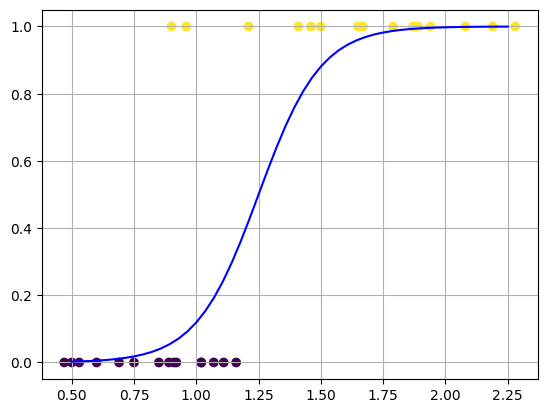

In [30]:
x = np.linspace(0.5,2.25, 50)   # 0.5 ~ 2.25사이 간격을 50등분함
# yy = logistic(x, lr.coef_,lr.intercept_) # 앞에서 구한 기울기와 절편은 여기에 맞지 않음
yy = logistic(x, 8,-10)  # 예제에 맞는 기울기와 절편을 설정

plt.scatter(X,y, c=y)
plt.plot(x.reshape(-1,1),yy.reshape(-1,1), 'b-')
plt.grid()
plt.show()

### 결정경계 시각화

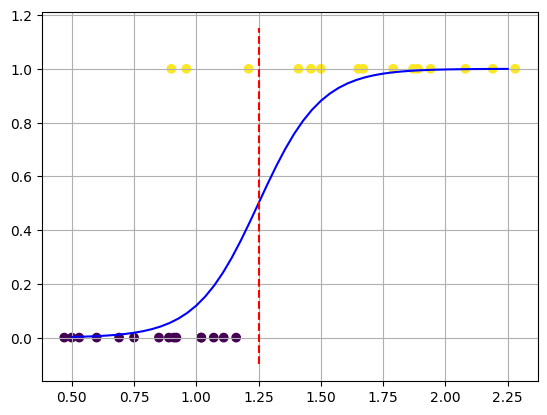

In [35]:
x = np.linspace(0.5,2.25, 50)
yy = logistic(x, 8,-10)  

# yy값이 0.5에 가장 가까울때의 x값을 찾음
idx = np.min(np.where(yy >= 0.5))
xp = x[idx]

plt.scatter(X,y, c=y)
plt.plot(x.reshape(-1,1),yy.reshape(-1,1), 'b-')
plt.plot([xp,xp],[-0.1,1.15], 'r--') # 결정경계 시각화
plt.grid()
plt.show()

In [36]:
# 결정계수 값
xp

1.25

### 로지스틱회귀로 곤충 암수 구분

In [44]:
pd.Series(y).value_counts()

1    15
0    15
dtype: int64

In [47]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y, train_size=0.7, stratify=y, random_state=2211171625)

In [48]:
lrclf = LogisticRegression()
lrclf.fit(X_train.reshape(-1,1),Y_train)
pred = lrclf.predict(X_test.reshape(-1,1))

accuracy_score(Y_test,pred)

0.7777777777777778

In [49]:
confusion_matrix(Y_test,pred)

array([[4, 0],
       [2, 3]], dtype=int64)

### 결정경계 시각화

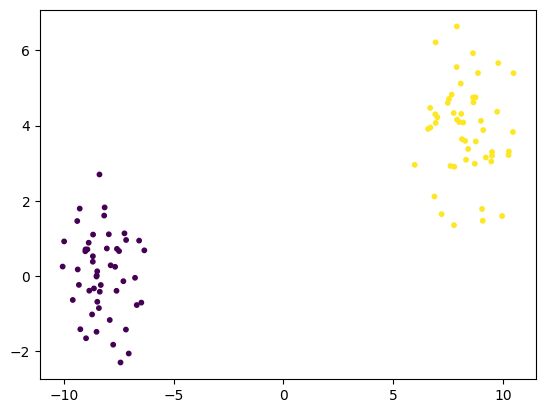

In [52]:
from sklearn.datasets import make_blobs

# make_blobs를 이용해서 정규분포를 따르는 가상데이터 생성
# n_samples : 표본수
# centers : 군집수
# cluster_std : 군집의 표준편차 (흩어짐 정도)
X,y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=2211171645)
plt.scatter(X[:,0],X[:,1], c=y, s=10)
plt.show()

In [54]:
lrclf = LogisticRegression()
lrclf.fit(X,y)

lrclf.score(X,y)  # 학습시 정확도

1.0

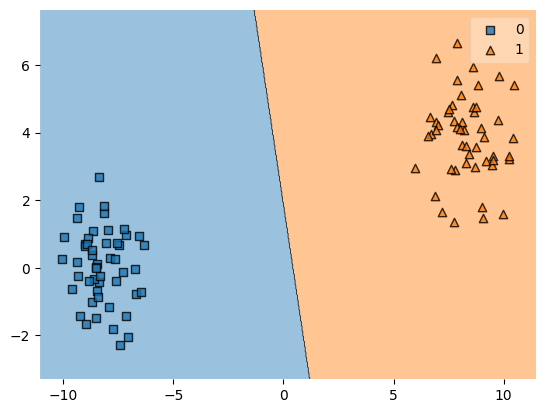

In [55]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf = lrclf) # X는 2차원이어야 함!
plt.show()